In [1]:
import numpy as np
from scipy import stats
import astropy
from astropy.table import Table
from astropy.nddata import CCDData
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy import wcs
import ccdproc
from ccdproc import trim_image
import PIL
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
import os

# Examining the Properties of the Aegean Source Tables

#### To more effectively understand the properties of the source tables, especially in terms of the overall distribution of multi-source islands (MSIs) and the relative number of sources within MSIs, it was deemed appropriate to undergo the following analysis

In [2]:
file_location = os.path.join(r'C:\Users\clent\Documents\4th Year Project Code\MEERKAT CATALOGS FULL', '*.vot')
filenames = glob.glob(file_location)
allvots = []
for i in filenames:
    allvots.append(Table.read(i))

In [3]:
count = np.arange(len(allvots))
for i in count:    
    print(filenames[i].split('\\')[-1][:-4])

G002.5+0.0IFx_Mosaic_Mom0_comp
G005.5+0.0IFx_Mosaic_Mom0_comp
G008.5+0.0IFx_Mosaic_Mom0_comp
G011.5+0.0IFx_Mosaic_Mom0_comp
G014.5+0.0IFx_Mosaic_Mom0_comp
G017.5+0.0IFx_Mosaic_Mom0_comp
G020.5+0.0IFx_Mosaic_Mom0_comp
G023.5+0.0IFx_Mosaic_Mom0_comp
G026.5+0.0IFx_Mosaic_Mom0_comp
G029.5+0.0IFx_Mosaic_Mom0_comp
G032.5+0.0IFx_Mosaic_Mom0_comp
G035.5+0.0IFx_Mosaic_Mom0_comp
G038.5+0.0IFx_Mosaic_Mom0_comp
G041.5+0.0IFx_Mosaic_Mom0_comp
G044.5+0.0IFx_Mosaic_Mom0_comp
G047.5+0.0IFx_Mosaic_Mom0_comp
G050.5+0.0IFx_Mosaic_Mom0_comp
G053.5+0.0IFx_Mosaic_Mom0_comp
G056.5+0.0IFx_Mosaic_Mom0_comp
G059.5+0.0IFx_Mosaic_Mom0_comp
G249.5-0.5IFx_Mosaic_Mom0_comp
G252.5-0.5IFx_Mosaic_Mom0_comp
G255.5-0.5IFx_Mosaic_Mom0_comp
G258.5-0.5IFx_Mosaic_Mom0_comp
G261.5-0.5IFx_Mosaic_Mom0_comp
G264.5-0.5IFx_Mosaic_Mom0_comp
G267.5-0.5IFx_Mosaic_Mom0_comp
G273.5-0.5IFx_Mosaic_Mom0_comp
G276.5-0.5IFx_Mosaic_Mom0_comp
G279.5-0.5IFx_Mosaic_Mom0_comp
G282.5-0.5IFx_Mosaic_Mom0_comp
G285.5-0.5IFx_Mosaic_Mom0_comp
G288.5-0

In [4]:
# print(allvots[0])
# print(allvots[1])

allvots_mult = []
count = np.arange(len(allvots))
for i in count:
    newT_single = astropy.table.unique(allvots[i], keys='island', keep='none')
    newT_combined = astropy.table.vstack(([allvots[i], newT_single]))
    newT_mult = astropy.table.unique(newT_combined, keep='none', silent=True)
    allvots_mult.append(newT_mult)

In [5]:
allvots_final = []
for i in count:
    newT_grouped = allvots_mult[i].group_by('island')
    finalT = newT_grouped.groups.aggregate(np.mean)
    allvots_final.append(finalT)

C:\Users\clent\Anaconda3\envs\tensorflow_env\lib\site-packages\astropy\table\groups.py:258: UserWarning: Warning: converting a masked element to nan.
  vals = np.array([func(par_col[i0: i1]) for i0, i1 in zip(i0s, i1s)])


In [6]:
allvots_compact = []
for i in count:
    compactT = Table([allvots_final[i]['island'], allvots_final[i]['lon'], allvots_final[i]['lat']])
    allvots_compact.append(compactT)

print(allvots_compact[0])

island        lon                 lat        
------ ------------------ -------------------
    18 3.5675960278050955 -1.5310183847924645
    28 3.1940378574336203 -1.5141307930373298
    35 2.7601788885529066 -1.4998802897603078
    48 2.3324519374024573 -1.4748348986442494
    57  2.480222135102502 -1.4735301912038097
    58 2.2503284022303953  -1.472111896404913
    59 2.7922194015915167 -1.4671410399044449
    69 2.5267363792560493 -1.4514617007894017
    88 3.8999195465726055 -1.4222916373064556
   175  2.149650881316166 -1.3387105014587592
   ...                ...                 ...
  4337  4.007059672048804  1.4031091788688355
  4355 2.2746404022101516   1.414503627031174
  4373 3.5680578846447326  1.4327508491663028
  4398  3.770537772802482   1.452792637973484
  4402 2.8532822640452977  1.4529705282928318
  4415 3.8876429558641776  1.4706250769314626
  4422  3.773572100821274  1.4757951152362896
  4425  2.948018151220915  1.4829940002565583
  4449 3.2671769827953376   1.5061

In [7]:
frame_lons = []
for i in count:
    frame_lons.append(np.mean(allvots_compact[i]['lon']))
    
frame_lons = np.array(frame_lons)

frame_lengths = []
for i in count:
    frame_lengths.append(len(allvots_compact[i]))
    
frame_lengths = np.array(frame_lengths)

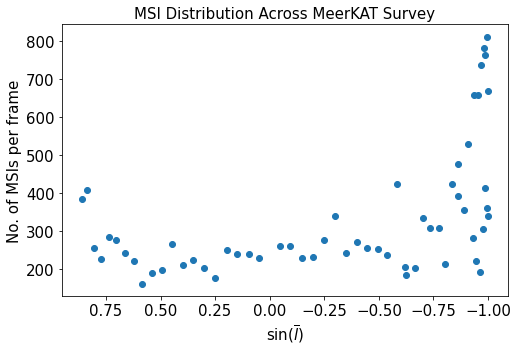

In [13]:
f=15

plt.figure(figsize=(8,5))
plt.scatter(np.sin((np.pi/180)*frame_lons), frame_lengths)
plt.title('MSI Distribution Across MeerKAT Survey', fontsize=f)
plt.xlabel('$\sin(\overline{l})$', fontsize=f)
plt.ylabel('No. of MSIs per frame', fontsize=f)
plt.xticks(fontsize = f)
plt.yticks(fontsize = f)
plt.gca().invert_xaxis()

In [9]:
#number of sources vs gal lon to compare with the above reduced table

allLons = []
for i in count:
    allLons.append(np.mean(allvots[i]['lon']))
    
allLons = np.array(allLons)
    
allLengths = []
for i in count:
    allLengths.append(len(allvots[i]))
    
allLengths = np.array(allLengths)

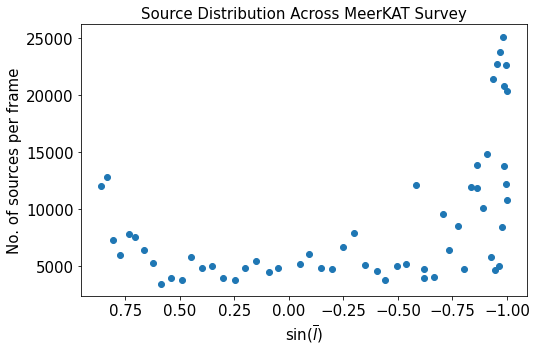

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(np.sin((np.pi/180)*allLons), allLengths)
plt.title('Source Distribution Across MeerKAT Survey', fontsize=f)
plt.xlabel('$\sin(\overline{l})$', fontsize=f)
plt.ylabel('No. of sources per frame', fontsize=f)
plt.xticks(fontsize = f)
plt.yticks(fontsize = f)
plt.gca().invert_xaxis()

### Seems to be a minimum at the galactic centre 